In [70]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
cd ../

/Users/emeunier/Desktop/DINO-Fusion


In [72]:
from utils import get_dataloader, TransformFields
import matplotlib.pyplot as plt
import webdataset as wds
from torchvision import transforms
from torch.utils.data import DataLoader
import numpy as np
import torch
import seaborn as sns
from configs.base_config import MiniConfig, DevConfig
from DiffusionModel import DiffusionModel

tar_file = '/Users/emeunier/Documents/mini_dino_1_4_degree.tar'

In [73]:
p = '/Users/emeunier/Documents/mini_dino_1_4_degree/infos/std.ssh.npy'
a = np.load(p)/1800.
np.save(p, a)

In [74]:
dl = iter(get_dataloader(tar_file, batch_size=7, step=5))
batch = next(dl)

Reading infos in /Users/emeunier/Documents/mini_dino_1_4_degree.tar


In [81]:
batch.shape

torch.Size([7, 15, 800, 248])

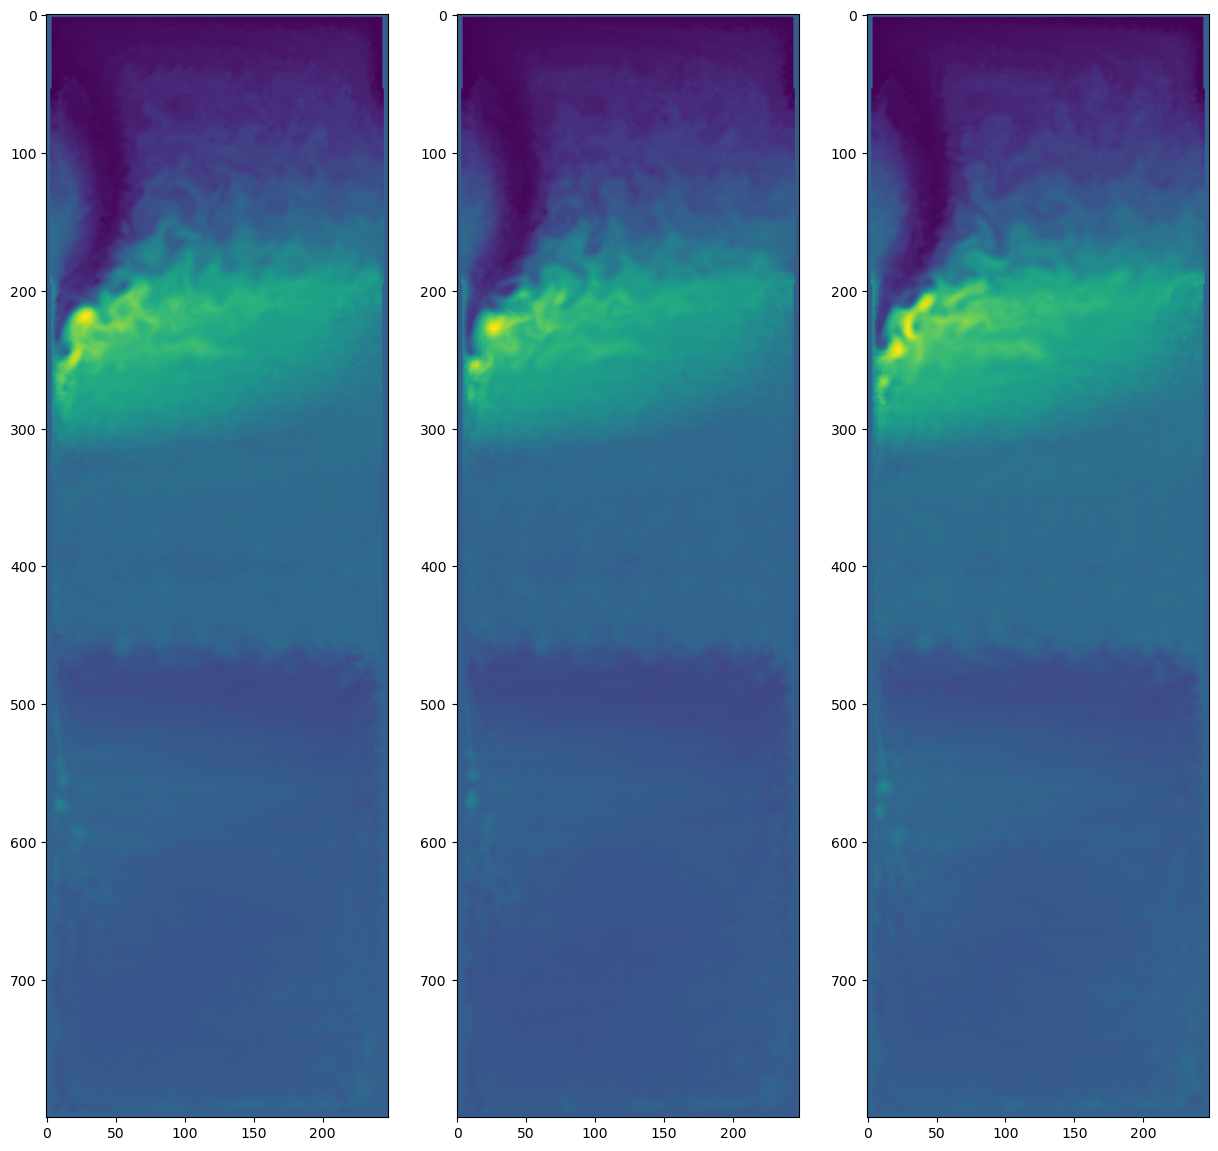

In [82]:
fig, axs = plt.subplots(1, 3, figsize=(15,15))
for i in range(3) : 
    axs[i].imshow(batch[i, -3])

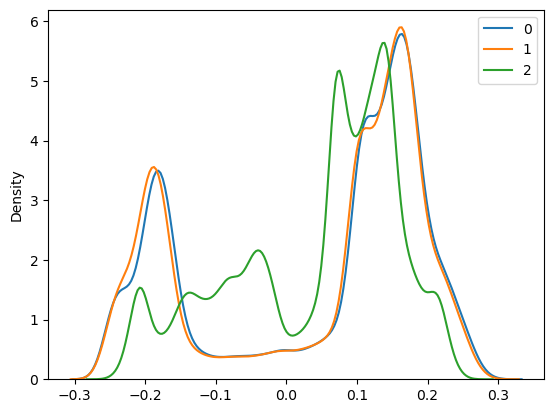

In [83]:
fig, ax = plt.subplots(1,1)

for i in range(3) :
    sns.kdeplot(batch[0, i, 5:-5, 5:-5].flatten(), ax=ax, label=i)
plt.legend()

In [84]:
config = DevConfig()
config.mixed_precision = 'no'

In [85]:
diffusion = DiffusionModel(config)

Config output dir : dev
UNet2DModel(
  (conv_in): Conv2d(17, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=32, out_features=128, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=128, out_features=128, bias=True)
  )
  (down_blocks): ModuleList(
    (0): DownBlock2D(
      (resnets): ModuleList(
        (0-1): 2 x ResnetBlock2D(
          (norm1): GroupNorm(32, 32, eps=1e-05, affine=True)
          (conv1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (time_emb_proj): Linear(in_features=128, out_features=32, bias=True)
          (norm2): GroupNorm(32, 32, eps=1e-05, affine=True)
          (dropout): Dropout(p=0.0, inplace=False)
          (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (nonlinearity): SiLU()
        )
      )
      (downsamplers): ModuleList(
        (0): Downsample2D(
          (

In [86]:
noisy_images, noises, timesteps = diffusion.get_noisy_images(batch)

In [87]:
clean_images = batch
noises = torch.randn(clean_images.shape, device=clean_images.device)
timesteps = torch.tensor([1, 100, 300, 500, 700, 900, 999])
noisy_images = diffusion.noise_scheduler.add_noise(clean_images, noises, timesteps[:, None])

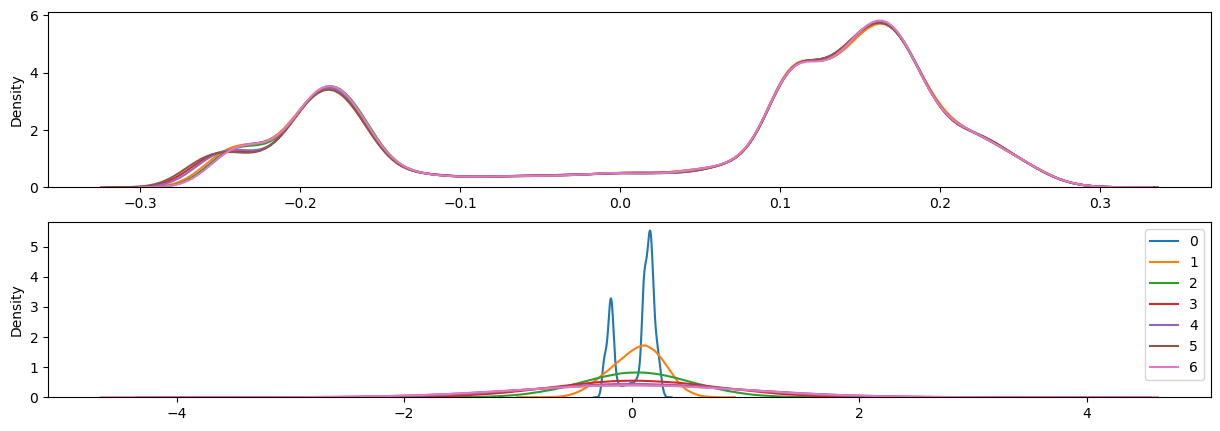

In [88]:
fig, axs = plt.subplots(2, 1, figsize=(15,5))

for i in range(7) :
    sns.kdeplot(clean_images[i, 0, 5:-5, 5:-5].flatten(), ax=axs[0], label=i)
    sns.kdeplot(noisy_images[i, 0, 5:-5, 5:-5].flatten(), ax=axs[1], label=i)
plt.legend()

In [89]:
batch.mean(axis=(0, 2,3))

tensor([ 0.0457,  0.0435,  0.0420,  0.0428,  0.0450,  0.0462,  0.0469, -0.0010,
        -0.0005,  0.0053,  0.0072,  0.0104, -0.0044, -0.0087, -0.0014])

In [48]:
timesteps.repeat(clean_images.shape[0], 1).shape

torch.Size([5, 6])